In [1]:
import numpy as np               # linear algebra
import pandas as pd              # data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization & graphical plotting
import seaborn as sns            # to visualize random distributions
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree, DecisionTreeClassifier,export_text
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import math
import joblib
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [2]:
data_preprocessed_path=r'D:\HeartRate Classification\data\data_preprocessed.xlsx'

In [3]:
df = pd.read_excel(data_preprocessed_path)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,0,39,3,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,1,46,1,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,0,48,0,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,1,61,2,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,1,46,2,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0


--> Tập dữ liệu lệch về số ca "khỏe mạnh"

## Scaler

In [4]:
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

# Select Importance Features

In [5]:
from sklearn.feature_selection import RFE
estimator = SVC(kernel="linear")
rfe = RFE(estimator=estimator, n_features_to_select=7)
# fit the model
rfe.fit(X, y)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=7)

In [6]:
feature_ranking = rfe.ranking_
feature_ranking

array([1, 3, 2, 6, 1, 1, 1, 1, 1, 9, 7, 5, 4, 8, 1])

In [7]:
important_features = X.columns[rfe.support_]
important_features

Index(['Gender', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'glucose'],
      dtype='object')

# Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.2, random_state=42)

# Training models

In [15]:
def evaluate(model_name, df):
    threshold = 0.5
    y_pred_binary = np.where(y_pred.squeeze() >= threshold, 1, 0)

    f1 = f1_score(y_test, y_pred_binary)
    auc_roc = roc_auc_score(y_test, y_pred_binary)

    temp = pd.DataFrame({
        "model": [model_name],
        "f1" : [f1],
        "auc_roc" : [auc_roc]
    })

    df = pd.concat([df, temp])
    return df

In [16]:
# eval_df used to stored metrics values
eval_df = pd.DataFrame()
# 11
rf_classifier = RandomForestClassifier()
dtree_classifier = DecisionTreeClassifier(max_depth= 11)
svm_classifier = SVC()
nb_classifier = GaussianNB()
gb_classifier = GradientBoostingClassifier()
knn = KNeighborsClassifier(4, weights="distance")

model_names = [
    'RandomForest',
    "DecisionTree",
    "SVC",
    "NB",
    "Gradient Boosting",
    "KNN"
]

models = [
    rf_classifier,
    dtree_classifier, 
    svm_classifier,
    nb_classifier,
    gb_classifier,
    knn,
]

for i in range(len(models)):
    print("##################################################")
    print(model_names[i])
    model = models[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    eval_df = evaluate(model_names[i], eval_df)

    # Tạo ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()
    print()
    joblib.dump(model, f'model/{model_names[i]}.pkl')
eval_df

##################################################
RandomForest
Confusion Matrix:
[[675  49]
 [106  18]]


##################################################
DecisionTree
Confusion Matrix:
[[696  28]
 [113  11]]


##################################################
SVC
Confusion Matrix:
[[722   2]
 [122   2]]


##################################################
NB
Confusion Matrix:
[[690  34]
 [107  17]]


##################################################
Gradient Boosting
Confusion Matrix:
[[712  12]
 [116   8]]


##################################################
KNN
Confusion Matrix:
[[693  31]
 [113  11]]




,model,f1,auc_roc
0,RandomForest,0.188482,0.538741
0,DecisionTree,0.134969,0.525018
0,SVC,0.031250,0.506683
0,NB,0.194286,0.545068
0,Gradient Boosting,0.111111,0.523971
0,KNN,0.132530,0.522946


## Important features


In [17]:
# importances = rf_classifier.feature_importances_
# feature_names = X_train.columns


# feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


# feature_importances = feature_importances.sort_values('Importance', ascending=False)


# plt.figure(figsize=(10, 6))
# sns.barplot(data=feature_importances, x='Importance', y='Feature')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.title('Features Importance')
# plt.tight_layout()
# plt.show()

# plot tree

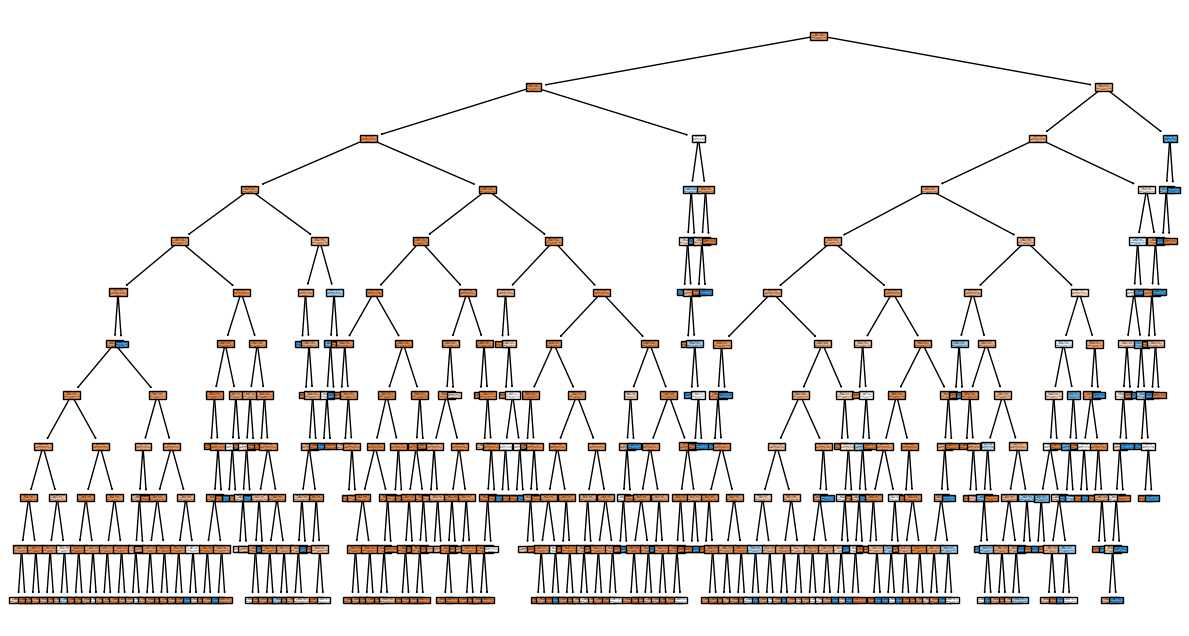

In [18]:
plt.figure(figsize=(15, 8))
plot_tree(
    dtree_classifier,
    filled=True,
    feature_names=X_train.columns,
    class_names=[str(c) for c in dtree_classifier.classes_],
    proportion=True
)
plt.show()

In [19]:
tree_text = export_text(dtree_classifier, feature_names=list(X_train.columns))
print(tree_text)

|--- prevalentHyp <= 0.50
|   |--- glucose <= 147.00
|   |   |--- Gender <= 0.50
|   |   |   |--- cigsPerDay <= 37.50
|   |   |   |   |--- glucose <= 87.50
|   |   |   |   |   |--- prevalentStroke <= 0.50
|   |   |   |   |   |   |--- glucose <= 82.50
|   |   |   |   |   |   |   |--- glucose <= 65.50
|   |   |   |   |   |   |   |   |--- glucose <= 63.50
|   |   |   |   |   |   |   |   |   |--- glucose <= 57.50
|   |   |   |   |   |   |   |   |   |   |--- cigsPerDay <= 17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- cigsPerDay >  17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- glucose >  57.50
|   |   |   |   |   |   |   |   |   |   |--- cigsPerDay <= 17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- cigsPerDay >  17.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- 